# Data visualization recap

The objective of proper data visualization is to enable quantitative reasoning by simply looking at the visualization in question. How data is perceived is affected by how it is displayed.

## 1. Import packages, import and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# SNB money-market rate data

df_raw = pd.read_csv('data/snb-data-rendoblim-en-all-20170502_1430.csv')
df_raw.head()

,Date,D0,Value
0,1988-01,1J,2.887
1,1988-01,2J,3.218
2,1988-01,3J,3.393
3,1988-01,4J,3.554
4,1988-01,5J,3.695


In [8]:
# info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4224 non-null   object 
 1   D0      4224 non-null   object 
 2   Value   4105 non-null   float64
dtypes: float64(1), object(2)
memory usage: 99.1+ KB


## 2. Initial EDA

In [9]:
# each row -> one observation (value, date, bond duration for bond D0)
len(df_raw), len(pd.unique(df_raw['Date'])), len(pd.unique(df_raw['D0'])), pd.unique(df_raw['D0'])

(4224,
 352,
 12,
 array(['1J', '2J', '3J', '4J', '5J', '6J', '7J', '8J', '9J', '10J', '20J',
        '30J'], dtype=object))

In [10]:
# df pivot
df_raw.pivot('Date', 'D0', 'Value').head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


### 2.1 Dtype issue

In [12]:
# check dtypes
df_raw.dtypes

Date      object
D0        object
Value    float64
dtype: object

In [15]:
# convert 'object' dytype for D0 (which is a date column) to date column dtype
df = df_raw.copy()
df['Date'] = pd.to_datetime(df['Date'])

# print dtypes and df head
print(df.dtypes)
df.head()

Date     datetime64[ns]
D0               object
Value           float64
dtype: object


,Date,D0,Value
0,1988-01-01,1J,2.887
1,1988-01-01,2J,3.218
2,1988-01-01,3J,3.393
3,1988-01-01,4J,3.554
4,1988-01-01,5J,3.695


## 3. Matplotlib styling

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

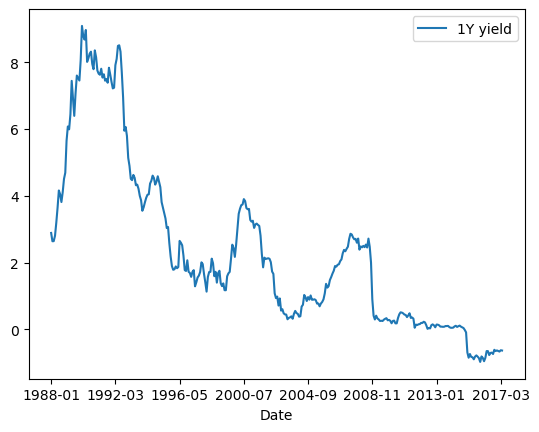

In [18]:
# standard plot raw df with correct datetime dtype
df_raw[df_raw['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

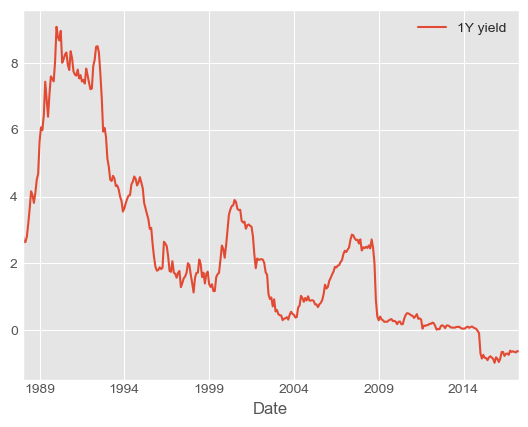

In [25]:
# ggplot plt styling
with plt.style.context(('ggplot')):
    df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

### 3.1 Set styling globally

In [24]:
# seaborn library darkgrid style
plt.style.use('seaborn-darkgrid')

/var/folders/19/7p1_1rpx29q852cb_f962cw40000gn/T/ipykernel_7041/2377868375.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


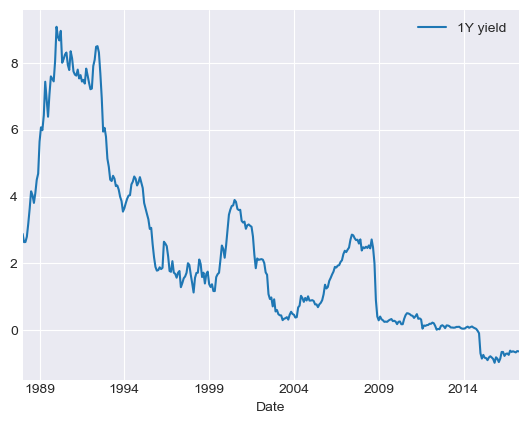

In [27]:
df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

## 4. Indexing

Indexing helps when a semantically meaningful indexing is needed.

In [33]:
# year 1999 for 1-year bonds
df[(df['Date'].dt.year == 1999) & (df['D0'] == '1J')]

,Date,D0,Value
1584,1999-01-01,1J,1.381
1596,1999-02-01,1J,1.293
1608,1999-03-01,1J,1.375
1620,1999-04-01,1J,1.171
1632,1999-05-01,1J,1.170
1644,1999-06-01,1J,1.588
1656,1999-07-01,1J,1.676
1668,1999-08-01,1J,1.720
1680,1999-09-01,1J,2.110
1692,1999-10-01,1J,2.536


In [34]:
# better way to take advantage of unique indexes made of 'Date' and 'D0'
df_indexed = df.set_index(['Date', 'D0'])
df_indexed.head()

Value
Date       D0       
1988-01-01 1J  2.887
           2J  3.218
           3J  3.393
           4J  3.554
           5J  3.695

In [36]:
# retrieve 1999 & 1J
df_indexed.loc[('1999', '1J'), :]

,Value
Date,
1999-01-01,1.381
1999-02-01,1.293
1999-03-01,1.375
1999-04-01,1.171
1999-05-01,1.170
1999-06-01,1.588
1999-07-01,1.676
1999-08-01,1.720
1999-09-01,2.110


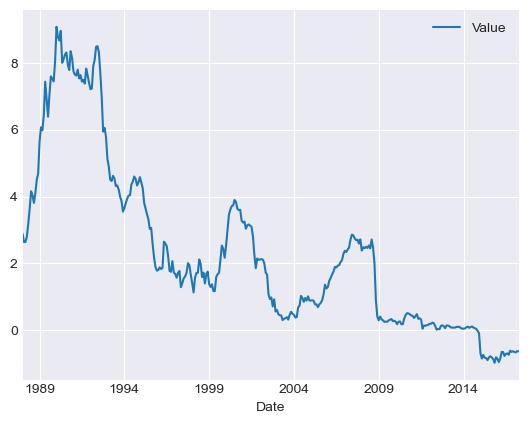

In [41]:
# every value for 1J in time, reset_index(1) to drop the second level from the index
df_indexed.loc[(slice(None), '1J'), :].reset_index(1).plot(label='1Y yield');

In [47]:
# 1Y 2Y bonds between september and december 2001
df_indexed.loc[(slice('2001-09', '2001-12'), ['1J', '2J']), :]

Value
Date       D0       
2001-09-01 1J  2.261
           2J  2.426
2001-10-01 1J  1.856
           2J  2.058
2001-11-01 1J  2.147
           2J  2.376
2001-12-01 1J  2.107
           2J  2.454

## 5. Plot vs subplot

In [66]:
# check index level 0
df_indexed.index.get_level_values(0)

DatetimeIndex(['1988-01-01', '1988-01-01', '1988-01-01', '1988-01-01',
               '1988-01-01', '1988-01-01', '1988-01-01', '1988-01-01',
               '1988-01-01', '1988-01-01',
               ...
               '2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01'],
              dtype='datetime64[ns]', name='Date', length=4224, freq=None)

In [67]:
# check index level 1
df_indexed.index.get_level_values(1)

Index(['1J', '2J', '3J', '4J', '5J', '6J', '7J', '8J', '9J', '10J',
       ...
       '3J', '4J', '5J', '6J', '7J', '8J', '9J', '10J', '20J', '30J'],
      dtype='object', name='D0', length=4224)

In [69]:
# unstack df level 1 index
df_wide = df_indexed.unstack(1)['Value']
df_wide.head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


### 5.1 Matplotlib vs pandas vs mix